In [1]:
# 以下のライブラリをこの章では使う
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 少数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)


In [2]:
dice_data = np.array([1, 2, 3, 4, 5, 6])

In [3]:
print('１つだけランダムに抽出:', np.random.choice(dice_data, 1))

１つだけランダムに抽出: [5]


In [4]:
# サイコロを1000回振ってみる
calc_steps = 1000

# 1～6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出された計算
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


In [5]:
coin_data = np.array([0,1])
coin_result = np.random.choice(coin_data, 1000)
print("表が出る確率:", len(coin_result[coin_result==0]) / 1000)
print("裏が出る確率:", len(coin_result[coin_result==1]) / 1000)

表が出る確率: 0.488
裏が出る確率: 0.512


In [6]:
100 / 1000 * 99 / 999

0.010

In [7]:
1 * 1/6 + 2* 1/6 + 3 * 1/6 + 4* 1/6 + 5*1/6 + 6*1/6

3.500

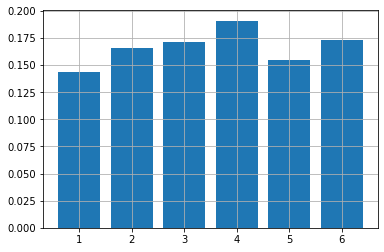

In [8]:
# 一様分布
# サイコロを1000回振ってみる
calc_steps = 1000

# 1～6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, p)
    
plt.bar(dice_data, prob_data)
plt.grid(True)

In [9]:
# ベルヌーイ関数
# 0:head(表), 1:tail(裏)と考える
# サンプル数を8とした
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])
# uniqueで一様な値を抽出
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)

0 が出る確率 0.625
1 が出る確率 0.375


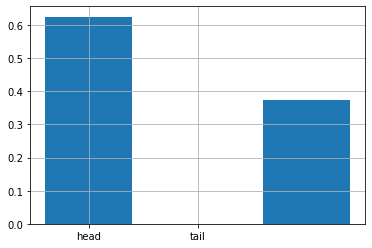

In [10]:
plt.bar([0,2], prob_be_data, align='center')
plt.xticks([0,1], ['head', 'tail'])
plt.grid(True)

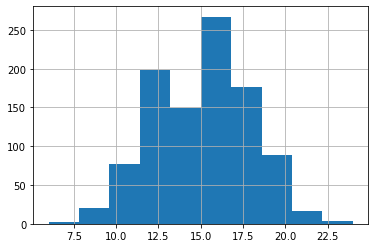

In [11]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

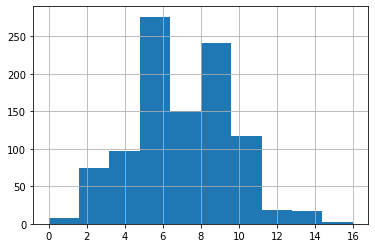

In [12]:
# ポアソン分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

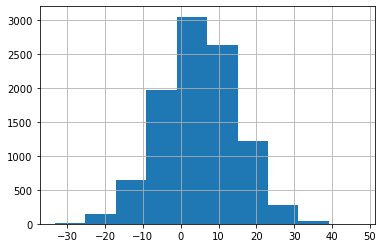

In [13]:
# 正規分布
# np.random.normal(平均, 標準偏差, サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

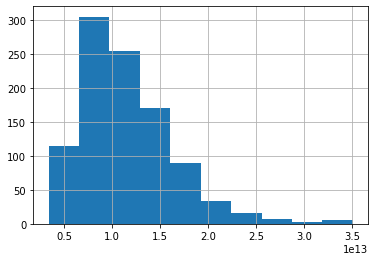

In [14]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

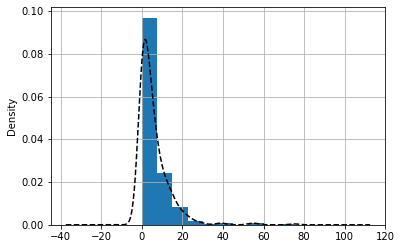

In [15]:
import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# データを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、density=Trueにすることで確立を表示
student_data_math.absences.hist(density=True)
plt.grid(True)

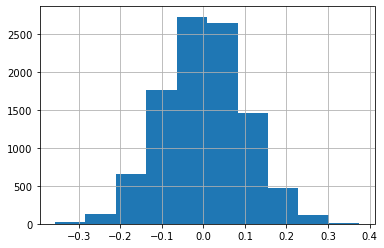

In [16]:
N = 10000
x = [np.random.normal(0, 1, 100).mean() for _ in range(N)]
plt.hist(x)
plt.grid(True)

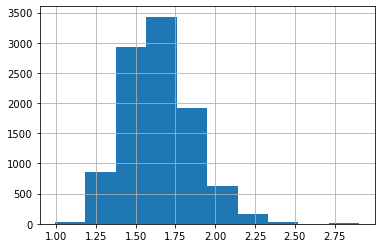

In [17]:
x = [np.random.lognormal(0, 1, 100).mean() for _ in range(N)]
plt.hist(x)
plt.grid(True)

<AxesSubplot:ylabel='Density'>

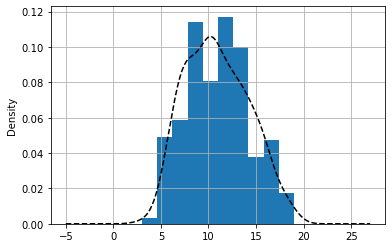

In [18]:
student_data_math.G1.plot(kind='kde', style='k--')

student_data_math.G1.hist(density=True)

In [19]:
# 必要なライブラリの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x
pos[:, :, 1] = y

In [20]:
# 多次元正規分布
# それぞれの変数の平均と共分散行列を設定
# 以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列になります
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 確率密度関数
z = rv.pdf(pos)

C:\Users\User\AppData\Local\Temp\ipykernel_2912\2506364261.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


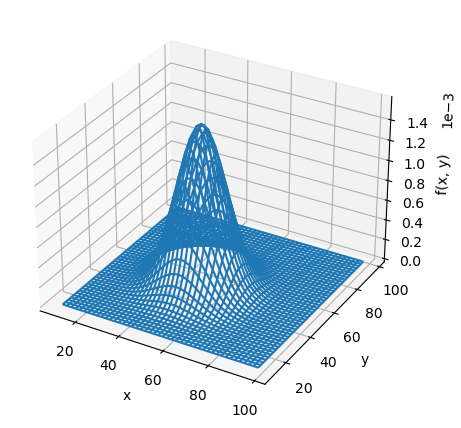

In [21]:
fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x, y, zのラベルの設定など
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

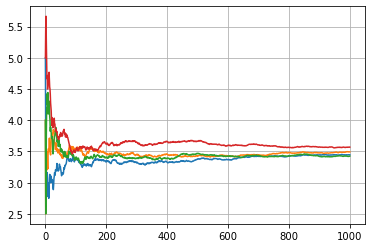

In [22]:
# 大数の法則
# 計算回数
calc_times = 1000
# サイコロ
sample_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1, calc_times + 1)

# 4つのバスを生成
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

In [23]:
# 中心極限定理
def function_central_theory(N):
    sample_array = np.array([1, 2,3,4,5,6])
    numaber_cnt = np.arange(1, N + 1) * 1.0
    
    mean_array = np.array([])
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
    plt.hist(mean_array)
    plt.grid(True)

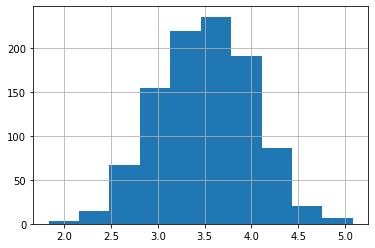

In [24]:
function_central_theory(10^6)

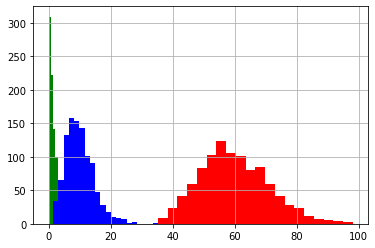

In [25]:
# カイ２条分布カイ
# 自由度2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2,10,60], 'gbr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x,20, color=c)
    plt.grid(True)

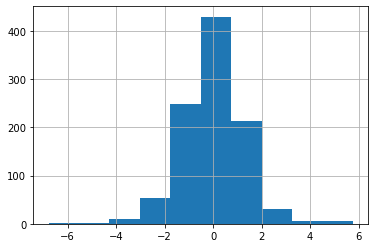

In [26]:
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

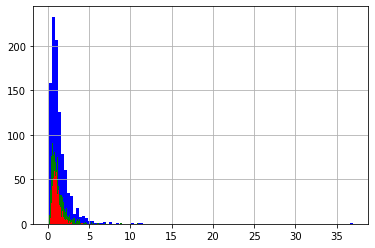

In [27]:
# F分布
for df, c in zip([ (6,7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

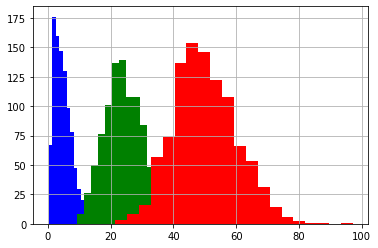

In [28]:
for df, c in zip([5,25,50], 'bgr'):
    x = np.random.chisquare(df,1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

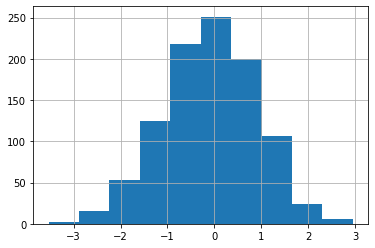

In [29]:
x = np.random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

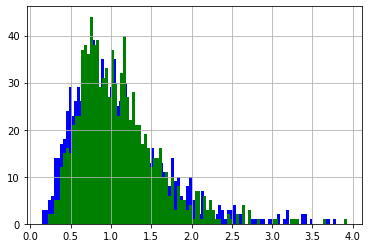

In [30]:
for df, c in zip([ (10, 30), (20, 25)], 'bg'):
    x = np.random.f(df[0],df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

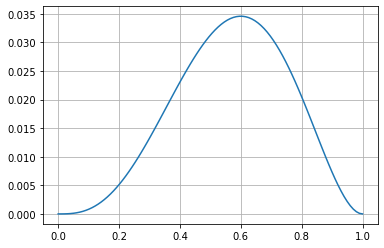

In [31]:
def q2(x):
    return (1-x)**2 * x**3
x = np.linspace(0, 1, 100)
plt.plot(x, q2(x))
plt.grid(True)

In [32]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_por = pd.read_csv('student-por.csv', sep=';')

student_data_merge = pd.merge(student_data_math,
                             student_data_por,
                             on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
                                 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'],
                             suffixes=('_math', '_por'))

print('G1数学の成績平均:', student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績平均:', student_data_merge.G1_por.mean())

G1数学の成績平均: 10.861256544502618
G1ポルトガル語の成績平均: 12.112565445026178


In [33]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print('p値 =', p )

p値 = 1.653655521710079e-16


In [40]:
t, p = stats.ttest_rel(student_data_merge.studytime_math, student_data_merge.studytime_por)
print('p値 =', p)

p値 = 0.5643842756976525
